In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv("train.csv")

In [4]:
train_data

,income,infant,region,oil
0,281,180.0,Africa,no
1,110,125.0,Asia,yes
2,123,100.0,Asia,no
3,335,65.1,Americas,no
4,75,400.0,Asia,no
...,...,...,...,...
79,130,100.0,Asia,no
80,956,44.8,Europe,no
81,102,124.3,Asia,no
82,406,43.3,Europe,no


In [11]:
train_data.describe()

,income,infant
count,84.000000,80.000000
mean,969.238095,92.267500
std,1402.084091,96.693918
min,50.000000,9.600000
25%,117.500000,26.800000
50%,334.000000,61.850000
75%,1047.750000,130.275000
max,5596.000000,650.000000


In [45]:
def label_encoding(data, name, le=None):
    if le is None:
        le = LabelEncoder()
        le = le.fit(list(set(data[name])))
    data[name] = le.transform(data[name])
    return le

label_encoding(train_data, 'oil')
label_encoding(train_data, 'region')

LabelEncoder()

In [46]:
train_data.corr()

,income,infant,region,oil
income,1.000000,-0.291310,0.487826,0.018219
infant,-0.291310,1.000000,-0.351509,0.310175
region,0.487826,-0.351509,1.000000,-0.024698
oil,0.018219,0.310175,-0.024698,1.000000


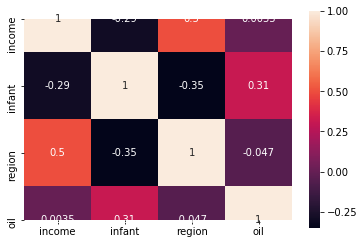

In [47]:
data = train_data.dropna()
correlation_matrix = data.corr()
fig = plt.figure()
sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True)
plt.show()

In [48]:
X = []
y = []

for index, row in data.iterrows():
    X.append([row['oil'], row['region']])
    y.append(row['infant'])

X = np.array([[x] for x in X])
    
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [44]:
for index, row in train_data.iterrows():
    if pd.isnull(row['infant']):
        row['infant'] = reg.predict(np.array([[row['oil']]]))[0]
        print(row['infant'])

83.03835616438356
83.03835616438356
188.51428571428568
83.03835616438356
